ある人（Aさん）が感じる夏の暑さと，温度と湿度のデータが与えられたとする．

In [1]:
# データ
# 温度，湿度，暑い(1)or暑くない(0)
import numpy as np

data = np.array([[17,40,0],
 [19,43,0],
 [20,64,0],
 [23,56,0],
 [23,56,0],
 [28,72,1],
 [28,49,0],
 [29,58,0],
 [30,67,1],
 [31,49,1],
 [33,62,1],
 [35,48,1]])

In [2]:
data[:,0]

array([17, 19, 20, 23, 23, 28, 28, 29, 30, 31, 33, 35])

In [3]:
data[:,1]

array([40, 43, 64, 56, 56, 72, 49, 58, 67, 49, 62, 48])

In [4]:
data[:,2]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [5]:
# リスト内包表記で0を'b'に，1を'r'に変換
['b' if i==0 else 'r' for i in data[:,2]]

['b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r']

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1],s=100,c=['b' if i==0 else 'r' for i in data[:,2]])
# グリッド表示
plt.grid(True)

# 表示
plt.show()

<Figure size 640x480 with 1 Axes>

<img src="work/1.png" width="400">

例えば，気温が29度で，湿度が58%のとき，Aさんは「暑くない」ということを表している．  
このデータから，「温度と湿度がどのようなときに，暑いと感じるのか，暑くないと感じるのか」を決定木で判定したいとします．  
すると，以下のような決定木が考えられます．  

<img src="work/2.png" width="300">

この決定木の条件で，気温と湿度のグラフに線を引くと以下のようになります．

<img src="work/3.png" width="400">

<img src="work/4.png" width="400">

つまり，決定木のに温度と湿度を与えると，「暑い」or「暑くない」を判定することができる．

# 決定木

仕組みについて説明する．

In [7]:
[data[:,0],data[:,1]]

[array([17, 19, 20, 23, 23, 28, 28, 29, 30, 31, 33, 35]),
 array([40, 43, 64, 56, 56, 72, 49, 58, 67, 49, 62, 48])]

In [8]:
data[:,[0,1]]

array([[17, 40],
       [19, 43],
       [20, 64],
       [23, 56],
       [23, 56],
       [28, 72],
       [28, 49],
       [29, 58],
       [30, 67],
       [31, 49],
       [33, 62],
       [35, 48]])

In [9]:
from sklearn import tree

X = data[:,[0,1]]
y = data[:,2]
# モデルを作成
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)

predicted = clf.predict(X)
print(predicted)

[0 0 0 0 0 0 0 0 1 1 1 1]


In [10]:
tree.export_graphviz(clf, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf

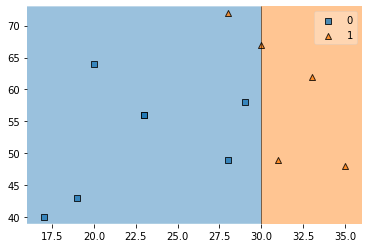

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)

# 原理

ジニ係数

$$
Gini = 1-\sum_i=1^N
$$

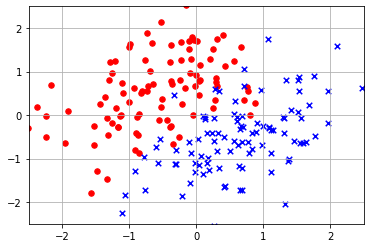

In [149]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケとスズキ）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定
# ただし，データのオーバーラップを生じさせて，難しくする．

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(0)

# データ数
num1 = 100
num2 = 100
num = num1 + num2

# 平均
mu1 = [-2,2]
mu2 = [2,-2]

# 共分散
cov = [[10,5],[5,10]]

# 入力信号を生成
x1, y1 = np.random.multivariate_normal(mu1, cov, num1).T
x2, y2 = np.random.multivariate_normal(mu2, cov, num2).T

x1 += 110
y1 += 2800
x2 += 110
y2 += 2800

# 教師信号を生成
cls1 = [1 for i in range(num1)]
cls2 = [-1 for i in range(num1)]

# DataFrameに変換
df1 = pd.DataFrame(np.array([x1,y1,cls1]).T, columns=['x1','x2','cls'])
df2 = pd.DataFrame(np.array([x2,y2,cls2]).T, columns=['x1','x2','cls'])
df = pd.concat([df1,df2],axis=0)
df = df.reset_index()

import sklearn.preprocessing as skl
df.x1 = skl.scale(df.x1) #正規化
df.x2 = skl.scale(df.x2) #正規化

# 散布図をプロットする
for i in range(len(df)):
    if df.cls[i]==1:
        plt.scatter(df.x1[i],df.x2[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df.x1[i],df.x2[i], color='b',marker='x', s=30)

# 表示範囲
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# グリッド表示
plt.grid(True)

# 表示
plt.show()

In [164]:
from sklearn import tree

X = df[['x1','x2']].values
y = df[['cls']].values
y = y.reshape(len(y),) # ベクトルにする

# モデルを作成
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


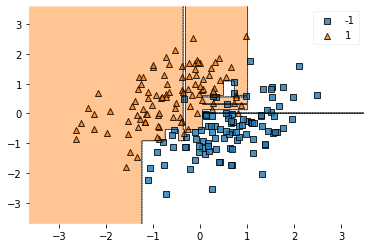

In [165]:
y = np.array(ｙ, dtype=np.int64)

predicted = clf.predict(X)
print(predicted)
tree.export_graphviz(clf, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf

# 領域を表示
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)

In [166]:
y = np.array(ｙ, dtype=np.int64)

In [167]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [168]:
print('正解率(train):{:.3f}'.format(clf.score(X,y)))


正解率(train):1.000


In [169]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケとスズキ）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定
# ただし，データのオーバーラップを生じさせて，難しくする．

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(2)

# データ数
num1 = 100
num2 = 100
num = num1 + num2

# 平均
mu1 = [-2,2]
mu2 = [2,-2]

# 共分散
cov = [[10,5],[5,10]]

# 入力信号を生成
x1, y1 = np.random.multivariate_normal(mu1, cov, num1).T
x2, y2 = np.random.multivariate_normal(mu2, cov, num2).T

x1 += 110
y1 += 2800
x2 += 110
y2 += 2800

# 教師信号を生成
cls1 = [1 for i in range(num1)]
cls2 = [-1 for i in range(num1)]

# DataFrameに変換
df1_test = pd.DataFrame(np.array([x1,y1,cls1]).T, columns=['x1','x2','cls'])
df2_test = pd.DataFrame(np.array([x2,y2,cls2]).T, columns=['x1','x2','cls'])
df_test = pd.concat([df1_test,df2_test],axis=0)
df_test = df_test.reset_index()

import sklearn.preprocessing as skl
df_test.x1 = skl.scale(df_test.x1) #正規化
df_test.x2 = skl.scale(df_test.x2) #正規化

[ 1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1.]
正解率(train):0.840


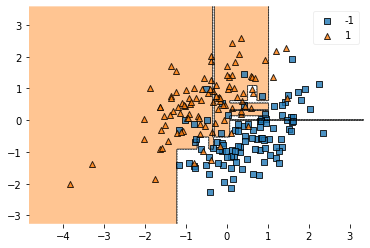

In [170]:

X_test = df_test[['x1','x2']].values
y_test = df_test[['cls']].values
y_test = y.reshape(len(y),) # ベクトルにする

y_test = np.array(ｙ_test, dtype=np.int64)

predicted = clf.predict(X_test)
print(predicted)
tree.export_graphviz(clf, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf

# 領域を表示
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf)

print('正解率(train):{:.3f}'.format(clf.score(X_test,y_test)))

In [133]:
df

,index,x1,x2,cls
0,0,-1.929436,-0.844476,1.0
1,1,-2.319207,0.734053,1.0
2,2,-1.272255,-1.659492,1.0
3,3,-1.020511,-0.523777,1.0
4,4,-0.525302,0.573503,1.0
...,...,...,...,...
195,95,-0.018190,-0.948915,-1.0
196,96,1.420974,-0.997962,-1.0
197,97,0.918053,-0.587262,-1.0
198,98,-0.965637,-0.439330,-1.0


In [134]:
df_test

,index,x1,x2,cls
0,0,0.025869,0.559192,1.0
1,1,0.420157,2.632933,1.0
2,2,1.491423,1.142623,1.0
3,3,-0.033959,-0.691419,1.0
4,4,0.969612,0.586340,1.0
...,...,...,...,...
195,95,-1.535086,-1.172464,-1.0
196,96,-1.649619,0.088837,-1.0
197,97,-1.253888,-1.137660,-1.0
198,98,0.442512,-0.126628,-1.0


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
正解率(train):1.000


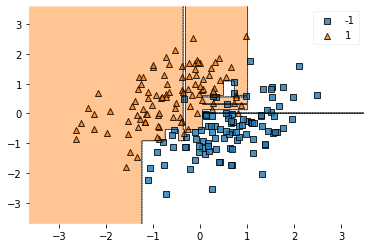

In [176]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=10)
forest.fit(X,y)

predicted = clf.predict(X)
print(predicted)
tree.export_graphviz(clf, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf

# 領域を表示
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)

print('正解率(train):{:.3f}'.format(clf.score(X,y)))

[ 1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1.]
正解率(train):0.840


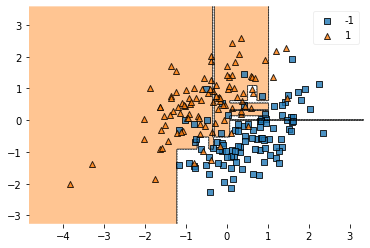

In [174]:
predicted = clf.predict(X_test)
print(predicted)
tree.export_graphviz(clf, out_file = 'temp.dot')
# dot -Tpdf temp.dot -o temp.pdf

# 領域を表示
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf)

print('正解率(train):{:.3f}'.format(clf.score(X_test,y_test)))